In [74]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
import umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing data

In [3]:
counts = pd.read_csv('TCGA-BRCA.htseq_fpkm.tsv', sep='\t', header=0, index_col=0)
# counts = pd.read_csv('normalized_counts.tsv', sep='\t', header=0, index_col=0)
counts.columns = counts.columns.str.replace('_', '-')
counts = counts.iloc[:-1, :]
counts

,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,TCGA-B6-A0I9-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268.2,0.091708,0.000000,0.057899,0.000000,0.000000,0.354334,0.000000,0.000000,0.000000,0.029266,...,0.234169,0.107850,0.000000,0.000000,0.000000,0.000000,0.471630,0.083825,0.000000,0.061585
ENSG00000270112.3,0.019573,0.004701,0.016302,0.000000,0.000000,0.000000,0.005787,0.000000,0.000000,0.028433,...,0.000000,0.003879,0.010047,0.000000,0.010919,0.000000,0.000000,0.000000,0.005858,0.008704
ENSG00000167578.15,2.235898,1.863334,1.704753,1.947481,2.734690,2.397119,2.337327,2.256976,1.968791,2.240375,...,1.928209,2.004722,2.971522,1.841232,1.185122,2.861514,1.626213,1.692995,2.051916,2.197365
ENSG00000273842.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000078237.5,2.321945,4.226699,1.975755,2.808757,1.964479,1.792870,1.939951,2.681632,2.091932,1.919117,...,2.024599,2.216023,2.124097,1.665709,2.217943,2.120565,1.605675,2.055448,2.195782,3.291072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273233.1,0.000000,0.055477,0.000000,0.000000,0.000000,0.065433,0.000000,0.000000,0.000000,0.227459,...,0.059299,0.045921,0.000000,0.000000,0.000000,0.000000,0.127060,0.000000,0.000000,0.000000
ENSG00000105063.17,3.680055,3.969785,3.011921,4.059347,4.249147,3.935869,4.082827,3.931459,3.870035,4.266755,...,3.348868,3.650676,4.478325,3.520017,3.372176,3.772585,3.133380,4.186347,3.340223,3.966532
ENSG00000231119.2,0.285640,0.115149,0.384451,0.345883,0.065679,0.837305,0.198863,0.216728,0.102007,0.164329,...,0.329875,0.232873,0.069587,0.117933,0.343273,0.149851,0.270187,0.484561,0.127070,0.174248


In [4]:
counts2 = counts.loc[(counts!=0).any(axis=1)]
counts2

,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,TCGA-B6-A0I9-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000242268.2,0.091708,0.000000,0.057899,0.000000,0.000000,0.354334,0.000000,0.000000,0.000000,0.029266,...,0.234169,0.107850,0.000000,0.000000,0.000000,0.000000,0.471630,0.083825,0.000000,0.061585
ENSG00000270112.3,0.019573,0.004701,0.016302,0.000000,0.000000,0.000000,0.005787,0.000000,0.000000,0.028433,...,0.000000,0.003879,0.010047,0.000000,0.010919,0.000000,0.000000,0.000000,0.005858,0.008704
ENSG00000167578.15,2.235898,1.863334,1.704753,1.947481,2.734690,2.397119,2.337327,2.256976,1.968791,2.240375,...,1.928209,2.004722,2.971522,1.841232,1.185122,2.861514,1.626213,1.692995,2.051916,2.197365
ENSG00000273842.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000078237.5,2.321945,4.226699,1.975755,2.808757,1.964479,1.792870,1.939951,2.681632,2.091932,1.919117,...,2.024599,2.216023,2.124097,1.665709,2.217943,2.120565,1.605675,2.055448,2.195782,3.291072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273233.1,0.000000,0.055477,0.000000,0.000000,0.000000,0.065433,0.000000,0.000000,0.000000,0.227459,...,0.059299,0.045921,0.000000,0.000000,0.000000,0.000000,0.127060,0.000000,0.000000,0.000000
ENSG00000105063.17,3.680055,3.969785,3.011921,4.059347,4.249147,3.935869,4.082827,3.931459,3.870035,4.266755,...,3.348868,3.650676,4.478325,3.520017,3.372176,3.772585,3.133380,4.186347,3.340223,3.966532
ENSG00000231119.2,0.285640,0.115149,0.384451,0.345883,0.065679,0.837305,0.198863,0.216728,0.102007,0.164329,...,0.329875,0.232873,0.069587,0.117933,0.343273,0.149851,0.270187,0.484561,0.127070,0.174248


In [5]:
gene_list = list(counts.index)
len(gene_list)

60482

In [6]:
conditions = pd.read_csv('condition.csv', header=0, index_col=0)
conditions

,diagnoses
TCGA-A2-A0CY-01A,stage ii
TCGA-B6-A40B-01A,stage i
TCGA-AO-A0J8-01A,stage ii
TCGA-E2-A14N-01A,stage ii
TCGA-BH-A1F0-01A,stage ii
...,...
TCGA-PE-A5DD-01A,stage ii
TCGA-E2-A10B-01A,stage ii
TCGA-BH-A0E0-01A,stage iii
TCGA-BH-A0E0-11A,stage iii


In [7]:
conditions.value_counts()

diagnoses
stage ii     693
stage iii    275
stage i      202
dtype: int64

In [8]:
methyl = pd.read_csv('brca_TCGA-BRCA.methylation450.tsv', sep='\t', header=0, index_col=0)
print(methyl.shape)
methyl.dropna(inplace=True)
methyl = methyl.loc[(methyl!=0).any(axis=1)]

(485577, 890)


In [9]:
methyl

,TCGA-AR-A24Z-01A,TCGA-GM-A4E0-01A,TCGA-BH-A0E1-11A,TCGA-E2-A1II-11A,TCGA-D8-A1JF-01A,TCGA-AC-A5XU-01A,TCGA-C8-A26Y-01A,TCGA-AR-A1AM-01A,TCGA-BH-A1EW-11B,TCGA-BH-A0C3-11A,...,TCGA-A7-A3J0-01A,TCGA-BH-A204-11A,TCGA-EW-A1P3-01A,TCGA-S3-A6ZF-01A,TCGA-E9-A1RD-01A,TCGA-B6-A0WW-01A,TCGA-E9-A1NI-01A,TCGA-BH-A1ES-06A,TCGA-AQ-A04L-01B,TCGA-AR-A1AY-01A
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.078943,0.232595,0.110045,0.141028,0.113496,0.121162,0.300070,0.182791,0.113210,0.129960,...,0.079067,0.606180,0.159162,0.375679,0.533845,0.135935,0.095978,0.084534,0.086629,0.098910
cg00000165,0.794522,0.317856,0.185484,0.169658,0.147922,0.808689,0.155674,0.114795,0.251102,0.234286,...,0.124234,0.332454,0.420493,0.635256,0.667238,0.707901,0.338659,0.690942,0.440745,0.874778
cg00000236,0.929247,0.841158,0.904202,0.878694,0.930195,0.888769,0.932735,0.930805,0.903241,0.872538,...,0.907074,0.925649,0.939415,0.855617,0.945926,0.908508,0.905511,0.913156,0.930395,0.931169
cg00000289,0.622736,0.631463,0.568728,0.742103,0.787131,0.584970,0.658063,0.727346,0.642150,0.649592,...,0.665986,0.784182,0.792214,0.338904,0.758070,0.632220,0.789174,0.680275,0.597392,0.593131
cg00000292,0.823418,0.698829,0.761969,0.643231,0.810539,0.598548,0.755290,0.502333,0.698367,0.693212,...,0.849107,0.722551,0.632080,0.329241,0.746803,0.614907,0.763993,0.452304,0.611430,0.799349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs9363764,0.032716,0.508394,0.556613,0.557826,0.963762,0.508488,0.581218,0.528138,0.606466,0.578875,...,0.950283,0.508096,0.041165,0.054680,0.619092,0.953664,0.486085,0.944383,0.172056,0.538746
rs939290,0.528532,0.957555,0.501939,0.528702,0.974949,0.451828,0.300394,0.968673,0.023775,0.526577,...,0.540809,0.443299,0.971816,0.969467,0.975679,0.241608,0.511583,0.964110,0.965380,0.968937
rs951295,0.040198,0.539345,0.041469,0.039058,0.518609,0.972496,0.558847,0.530592,0.527922,0.521736,...,0.063769,0.971644,0.971090,0.623752,0.480648,0.979132,0.028718,0.468722,0.032989,0.747458


In [10]:
methyl_list = list(methyl.index)
methyl_list

['cg00000029',
 'cg00000165',
 'cg00000236',
 'cg00000289',
 'cg00000292',
 'cg00000363',
 'cg00000622',
 'cg00000658',
 'cg00000721',
 'cg00000734',
 'cg00000769',
 'cg00000905',
 'cg00000924',
 'cg00000948',
 'cg00000957',
 'cg00001245',
 'cg00001249',
 'cg00001261',
 'cg00001349',
 'cg00001364',
 'cg00001446',
 'cg00001510',
 'cg00001582',
 'cg00001583',
 'cg00001687',
 'cg00001747',
 'cg00001791',
 'cg00001809',
 'cg00001854',
 'cg00001874',
 'cg00002033',
 'cg00002116',
 'cg00002145',
 'cg00002190',
 'cg00002224',
 'cg00002236',
 'cg00002406',
 'cg00002426',
 'cg00002449',
 'cg00002464',
 'cg00002490',
 'cg00002531',
 'cg00002591',
 'cg00002593',
 'cg00002597',
 'cg00002646',
 'cg00002660',
 'cg00002719',
 'cg00002769',
 'cg00002808',
 'cg00002809',
 'cg00002810',
 'cg00002837',
 'cg00002930',
 'cg00003091',
 'cg00003173',
 'cg00003181',
 'cg00003202',
 'cg00003287',
 'cg00003298',
 'cg00003345',
 'cg00003513',
 'cg00003529',
 'cg00003578',
 'cg00003625',
 'cg00003784',
 'cg000039

In [11]:
# merge counts and condition based on the index
df1 = pd.merge(counts.T, methyl.T, left_index=True, right_index=True)
df1

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
TCGA-E9-A1NI-01A,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,0.084661,...,0.429022,0.976140,0.359002,0.971380,0.538542,0.486085,0.511583,0.028718,0.428460,0.959949
TCGA-A1-A0SP-01A,0.000000,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,0.000000,...,0.021722,0.013119,0.491017,0.488211,0.616124,0.049026,0.328322,0.977102,0.443839,0.910627
TCGA-BH-A1EU-11A,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.125310,0.461624,...,0.975991,0.009697,0.442623,0.533875,0.974114,0.553917,0.518362,0.981159,0.050143,0.952316
TCGA-AC-A8OS-01A,0.354334,0.000000,2.397119,0.0,1.792870,3.556193,0.0,0.037629,6.474977,0.521882,...,0.961002,0.353337,0.444270,0.539221,0.526943,0.564616,0.975903,0.971570,0.930168,0.606411
TCGA-OL-A5RY-01A,0.000000,0.000000,2.256976,0.0,2.681632,3.644497,0.0,0.021054,7.620826,0.289074,...,0.484030,0.401510,0.422727,0.513400,0.523420,0.533641,0.972008,0.509304,0.939145,0.065830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EW-A1P3-01A,0.000000,0.000000,2.861514,0.0,2.120565,2.992269,0.0,0.037693,7.673599,0.535481,...,0.488012,0.271427,0.473955,0.576336,0.962821,0.041165,0.971816,0.971090,0.962513,0.609994
TCGA-A7-A13F-11A,0.471630,0.000000,1.626213,0.0,1.605675,3.224406,0.0,0.039177,7.439460,0.775822,...,0.972566,0.360833,0.441643,0.541741,0.971856,0.031724,0.517111,0.977023,0.445230,0.661501
TCGA-A2-A0T6-01A,0.083825,0.000000,1.692995,0.0,2.055448,3.476192,0.0,0.033737,7.138577,0.220669,...,0.974610,0.972898,0.925179,0.971659,0.970834,0.585451,0.967152,0.532752,0.928780,0.937626
TCGA-A7-A5ZW-01A,0.000000,0.005858,2.051916,0.0,2.195782,3.369091,0.0,0.031773,7.446467,0.249784,...,0.018931,0.976085,0.544069,0.974851,0.015507,0.049849,0.553903,0.547689,0.462018,0.900842


In [12]:
micro = pd.read_csv('TCGA-BRCA.mirna.tsv', sep='\t', header=0, index_col=0)
print(micro.shape)
micro = micro.loc[(micro!=0).any(axis=1)]
micro

(1881, 1202)


,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-LL-A5YP-01A,TCGA-E2-A14T-01A,TCGA-AR-A24O-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-E9-A24A-01A,TCGA-E9-A1RB-01A,TCGA-A2-A0CP-01A,...,TCGA-E2-A1L6-01A,TCGA-BH-A0DT-11A,TCGA-A2-A0SV-01A,TCGA-BH-A0BO-01A,TCGA-B6-A0RN-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
miRNA_ID,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a-1,12.686183,12.891305,12.887718,14.108360,13.461873,12.265034,12.998680,13.383760,12.845777,12.974924,...,12.978411,14.018583,12.404741,13.441146,13.168463,12.648896,14.119837,12.751446,13.497555,13.377192
hsa-let-7a-2,12.662222,12.869347,12.879000,14.118814,13.476615,12.241975,13.005067,13.380326,12.844904,13.013343,...,12.960026,14.003807,12.380744,13.449313,13.154539,12.662858,14.135787,12.752993,13.505774,13.359864
hsa-let-7a-3,12.702090,12.888348,12.900761,14.155944,13.488667,12.290275,12.997857,13.388873,12.853264,13.009295,...,12.967357,14.035824,12.439656,13.443056,13.196045,12.676500,14.147772,12.762161,13.497234,13.375518
hsa-let-7b,13.954108,15.019690,13.485065,13.811893,15.261777,13.809151,13.627295,14.974551,14.759085,14.286339,...,14.674505,14.873317,14.013927,15.261052,16.636407,14.392788,14.788002,14.928173,14.451789,14.947434
hsa-let-7c,10.343736,10.822866,10.325324,11.047247,12.039291,9.057759,11.581334,10.195591,9.996306,11.989837,...,11.401806,13.281604,9.512755,12.257532,11.504708,10.826527,13.046762,11.080933,12.224227,10.234638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-mir-95,1.626492,4.381362,1.428192,1.013901,1.466000,1.259219,1.144290,1.600739,0.918977,2.046411,...,1.950539,1.351359,1.651894,1.178115,1.095819,1.983283,2.359762,1.076831,1.193597,1.035478
hsa-mir-96,5.486710,5.365221,4.935182,5.246102,4.682331,5.539974,2.952988,4.192225,3.703261,4.557138,...,6.000770,3.365852,3.899755,4.825829,5.970415,5.630192,1.504278,3.069699,4.148438,3.420965
hsa-mir-98,5.943471,6.053592,6.782349,4.794847,5.562759,6.602330,5.489263,6.138740,6.054672,5.639234,...,5.144954,5.184865,5.697202,5.400939,4.763354,5.390010,5.901553,5.274988,5.420709,5.022092


In [13]:
micro_list = list(micro.index)
micro_list

['hsa-let-7a-1',
 'hsa-let-7a-2',
 'hsa-let-7a-3',
 'hsa-let-7b',
 'hsa-let-7c',
 'hsa-let-7d',
 'hsa-let-7e',
 'hsa-let-7f-1',
 'hsa-let-7f-2',
 'hsa-let-7g',
 'hsa-let-7i',
 'hsa-mir-1-1',
 'hsa-mir-1-2',
 'hsa-mir-100',
 'hsa-mir-101-1',
 'hsa-mir-101-2',
 'hsa-mir-103a-1',
 'hsa-mir-103a-2',
 'hsa-mir-103b-1',
 'hsa-mir-105-1',
 'hsa-mir-105-2',
 'hsa-mir-106a',
 'hsa-mir-106b',
 'hsa-mir-107',
 'hsa-mir-10a',
 'hsa-mir-10b',
 'hsa-mir-1178',
 'hsa-mir-1179',
 'hsa-mir-1180',
 'hsa-mir-1181',
 'hsa-mir-1182',
 'hsa-mir-1184-1',
 'hsa-mir-1184-3',
 'hsa-mir-1185-1',
 'hsa-mir-1185-2',
 'hsa-mir-1193',
 'hsa-mir-1197',
 'hsa-mir-1199',
 'hsa-mir-1203',
 'hsa-mir-1204',
 'hsa-mir-1205',
 'hsa-mir-1206',
 'hsa-mir-1207',
 'hsa-mir-122',
 'hsa-mir-1224',
 'hsa-mir-1225',
 'hsa-mir-1226',
 'hsa-mir-1227',
 'hsa-mir-1228',
 'hsa-mir-1229',
 'hsa-mir-1231',
 'hsa-mir-1233-2',
 'hsa-mir-1234',
 'hsa-mir-1236',
 'hsa-mir-1237',
 'hsa-mir-1238',
 'hsa-mir-124-1',
 'hsa-mir-124-2',
 'hsa-mir-1

In [14]:
df2 = pd.merge(df1, micro.T, left_index=True, right_index=True)
df2

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,hsa-mir-940,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-E9-A1NI-01A,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,0.084661,...,4.145751,0.0,0.000000,0.000000,0.000000,1.626492,5.486710,5.943471,8.977608,16.204958
TCGA-A1-A0SP-01A,0.000000,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,0.000000,...,3.260019,0.0,3.338596,0.000000,0.000000,4.381362,5.365221,6.053592,9.241627,14.983204
TCGA-BH-A1EU-11A,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.125310,0.461624,...,1.285771,0.0,1.285771,0.000000,1.285771,2.057926,2.692621,5.326140,11.542593,13.849563
TCGA-AC-A8OS-01A,0.354334,0.000000,2.397119,0.0,1.792870,3.556193,0.0,0.037629,6.474977,0.521882,...,0.898484,0.0,1.940808,0.167928,0.454524,1.844915,5.904067,5.313294,10.438935,14.035927
TCGA-OL-A5RY-01A,0.000000,0.000000,2.256976,0.0,2.681632,3.644497,0.0,0.021054,7.620826,0.289074,...,1.026774,0.0,3.046533,0.000000,1.699479,1.144290,2.952988,5.489263,9.875042,14.111740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EW-A1P3-01A,0.000000,0.000000,2.861514,0.0,2.120565,2.992269,0.0,0.037693,7.673599,0.535481,...,2.384018,0.0,1.983283,0.000000,1.180126,1.983283,5.630192,5.390010,9.517134,15.013499
TCGA-A7-A13F-11A,0.471630,0.000000,1.626213,0.0,1.605675,3.224406,0.0,0.039177,7.439460,0.775822,...,1.504278,0.0,2.801093,0.000000,2.075343,2.359762,1.504278,5.901553,11.459398,15.169036
TCGA-A2-A0T6-01A,0.083825,0.000000,1.692995,0.0,2.055448,3.476192,0.0,0.033737,7.138577,0.220669,...,0.798754,0.0,1.076831,0.000000,0.000000,1.076831,3.069699,5.274988,9.178330,14.405117
TCGA-A7-A5ZW-01A,0.000000,0.005858,2.051916,0.0,2.195782,3.369091,0.0,0.031773,7.446467,0.249784,...,0.280406,0.0,1.051502,0.000000,1.748422,1.193597,4.148438,5.420709,9.467839,13.415149


In [15]:
df3 = pd.merge(df2, conditions, left_index=True, right_index=True)
df3

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,diagnoses
TCGA-E9-A1NI-01A,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,0.084661,...,0.0,0.000000,0.000000,0.000000,1.626492,5.486710,5.943471,8.977608,16.204958,stage ii
TCGA-A1-A0SP-01A,0.000000,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,0.000000,...,0.0,3.338596,0.000000,0.000000,4.381362,5.365221,6.053592,9.241627,14.983204,stage ii
TCGA-BH-A1EU-11A,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.125310,0.461624,...,0.0,1.285771,0.000000,1.285771,2.057926,2.692621,5.326140,11.542593,13.849563,stage i
TCGA-AC-A8OS-01A,0.354334,0.000000,2.397119,0.0,1.792870,3.556193,0.0,0.037629,6.474977,0.521882,...,0.0,1.940808,0.167928,0.454524,1.844915,5.904067,5.313294,10.438935,14.035927,stage ii
TCGA-OL-A5RY-01A,0.000000,0.000000,2.256976,0.0,2.681632,3.644497,0.0,0.021054,7.620826,0.289074,...,0.0,3.046533,0.000000,1.699479,1.144290,2.952988,5.489263,9.875042,14.111740,stage ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EW-A1P3-01A,0.000000,0.000000,2.861514,0.0,2.120565,2.992269,0.0,0.037693,7.673599,0.535481,...,0.0,1.983283,0.000000,1.180126,1.983283,5.630192,5.390010,9.517134,15.013499,stage ii
TCGA-A7-A13F-11A,0.471630,0.000000,1.626213,0.0,1.605675,3.224406,0.0,0.039177,7.439460,0.775822,...,0.0,2.801093,0.000000,2.075343,2.359762,1.504278,5.901553,11.459398,15.169036,stage iii
TCGA-A2-A0T6-01A,0.083825,0.000000,1.692995,0.0,2.055448,3.476192,0.0,0.033737,7.138577,0.220669,...,0.0,1.076831,0.000000,0.000000,1.076831,3.069699,5.274988,9.178330,14.405117,stage ii
TCGA-A7-A5ZW-01A,0.000000,0.005858,2.051916,0.0,2.195782,3.369091,0.0,0.031773,7.446467,0.249784,...,0.0,1.051502,0.000000,1.748422,1.193597,4.148438,5.420709,9.467839,13.415149,stage ii


## Feature selection

### Deal with gene expression

In [16]:
# separate columns that represent genes
df_gene = df3[gene_list]

In [17]:
# use mutual information to selection genes
selector = SelectKBest(chi2, k=500)
selector.fit(df_gene, df3['diagnoses'])
df_gene2 = selector.transform(df_gene)
df_gene2 = pd.DataFrame(df_gene2, index=df_gene.index, columns=df_gene.columns[selector.get_support()])
df_gene2

,ENSG00000227766.1,ENSG00000105048.15,ENSG00000168306.11,ENSG00000158481.11,ENSG00000137440.4,ENSG00000251676.1,ENSG00000234068.5,ENSG00000280081.2,ENSG00000170419.9,ENSG00000164220.6,...,ENSG00000211611.2,ENSG00000158639.10,ENSG00000185904.10,ENSG00000240521.1,ENSG00000156234.7,ENSG00000065371.16,ENSG00000252824.1,ENSG00000174175.15,ENSG00000261409.1,ENSG00000100167.18
TCGA-E9-A1NI-01A,3.536722,4.015687,4.662167,0.603653,0.072356,0.000000,0.049977,0.000000,0.000000,2.894249,...,0.000000,0.235688,0.410338,0.199495,3.435337,0.000000,0.000000,0.163713,0.020044,0.884209
TCGA-A1-A0SP-01A,3.610904,4.361913,0.386551,1.869260,3.953123,0.000000,0.000000,0.093837,0.020049,1.808740,...,1.705923,0.051504,3.102518,0.098776,2.028925,1.584850,0.248104,1.700021,0.019163,4.420325
TCGA-BH-A1EU-11A,2.192825,0.038132,2.414692,1.466057,1.826121,0.034594,0.000000,0.129082,0.000000,1.710311,...,2.078083,0.088511,0.320557,0.000000,1.447289,1.201564,0.407811,2.810378,0.158839,1.306403
TCGA-AC-A8OS-01A,4.210759,0.504682,2.667338,1.679821,0.061615,0.000000,0.083801,0.011430,0.033071,4.347029,...,0.791000,0.000000,1.052521,0.078494,2.233219,0.073820,0.000000,3.265193,0.044955,0.662431
TCGA-OL-A5RY-01A,2.183824,0.197013,1.738365,4.436662,4.125351,0.000000,0.000000,0.096037,0.046507,3.756345,...,5.243915,0.074751,1.068937,0.000000,6.683560,0.507786,0.000000,3.362359,0.007039,1.279374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EW-A1P3-01A,1.932258,5.947377,5.904258,1.208409,0.026038,0.000000,0.053033,0.000000,0.005972,3.893220,...,0.573078,0.000000,0.088880,0.025034,1.383232,0.015721,0.000000,2.206903,0.007130,0.612618
TCGA-A7-A13F-11A,2.097005,0.194747,2.560393,1.121169,2.134544,0.000000,0.000000,0.151182,0.000000,1.441302,...,3.210915,0.000000,0.968337,0.000000,0.058124,1.155967,0.000000,3.265104,0.140194,1.364823
TCGA-A2-A0T6-01A,2.626613,1.171304,1.343286,2.451417,0.014953,0.000000,0.000000,0.000000,0.000000,3.460040,...,2.530471,0.043782,0.368268,0.056656,3.629730,0.000000,0.000000,2.409375,0.012214,0.516486
TCGA-A7-A5ZW-01A,0.547226,3.051113,2.577492,2.547439,0.298428,0.024857,0.000000,0.000000,0.000000,4.421259,...,1.833523,0.000000,0.203454,0.021088,0.894073,0.277367,0.000000,2.351737,0.000000,0.687051


Dealing with DEGs

In [18]:
deg_gene1 = pd.read_csv('deg_gene1.csv', header=0, index_col=0)
deg_gene1.index

Index(['ENSG00000011677.11', 'ENSG00000012504.12', 'ENSG00000063015.18',
       'ENSG00000075388.3', 'ENSG00000103310.9', 'ENSG00000105550.7',
       'ENSG00000122852.13', 'ENSG00000126752.7', 'ENSG00000130287.12',
       'ENSG00000131668.12', 'ENSG00000131914.9', 'ENSG00000135346.7',
       'ENSG00000139800.8', 'ENSG00000143556.7', 'ENSG00000144820.6',
       'ENSG00000145920.13', 'ENSG00000158764.6', 'ENSG00000162621.6',
       'ENSG00000163207.6', 'ENSG00000163825.3', 'ENSG00000164756.11',
       'ENSG00000170477.11', 'ENSG00000170893.3', 'ENSG00000171401.13',
       'ENSG00000171557.15', 'ENSG00000175426.9', 'ENSG00000176566.4',
       'ENSG00000176840.10', 'ENSG00000178171.9', 'ENSG00000178235.7',
       'ENSG00000184330.10', 'ENSG00000187690.3', 'ENSG00000188508.9',
       'ENSG00000189001.9', 'ENSG00000189182.8', 'ENSG00000196361.8',
       'ENSG00000198930.11', 'ENSG00000199347.1', 'ENSG00000200087.1',
       'ENSG00000201098.1', 'ENSG00000201793.1', 'ENSG00000201998.1',
      

In [19]:
deg_gene2 = pd.read_csv('deg_gene.csv', header=0, index_col=0)
deg_gene2.index

Index(['ENSG00000006377.10', 'ENSG00000022355.13', 'ENSG00000068985.4',
       'ENSG00000072041.15', 'ENSG00000075388.3', 'ENSG00000100604.11',
       'ENSG00000111700.11', 'ENSG00000112238.11', 'ENSG00000112280.14',
       'ENSG00000115386.5',
       ...
       'ENSG00000275090.1', 'ENSG00000275216.1', 'ENSG00000278099.1',
       'ENSG00000278771.1', 'ENSG00000279502.1', 'ENSG00000279991.1',
       'ENSG00000280081.2', 'ENSG00000280190.1', 'ENSG00000280291.1',
       'ENSG00000280365.1'],
      dtype='object', length=191)

In [20]:
deglist = list(set(deg_gene1.index) & set(deg_gene2.index))
len(deglist)

13

In [21]:
df_gene3 = df_gene.loc[:, deglist]
df_gene3

,ENSG00000239835.1,ENSG00000187690.3,ENSG00000196361.8,ENSG00000162621.6,ENSG00000189182.8,ENSG00000075388.3,ENSG00000248538.5,ENSG00000266019.1,ENSG00000199347.1,ENSG00000178171.9,ENSG00000201098.1,ENSG00000201793.1,ENSG00000171557.15
TCGA-E9-A1NI-01A,0.029470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368754,0.000000,0.005128,0.270452,0.108254,0.775610
TCGA-A1-A0SP-01A,0.000000,0.000000,0.020102,0.000000,0.571405,0.000000,0.864499,0.000000,0.981263,0.003678,0.198861,0.000000,0.026525
TCGA-BH-A1EU-11A,0.000000,0.000000,0.008783,0.010829,0.010575,0.000000,0.137086,0.000000,0.000000,0.006396,0.330317,0.133875,0.154537
TCGA-AC-A8OS-01A,0.025040,0.029267,0.005977,0.007371,0.007198,0.000000,0.032228,0.318549,0.730200,0.000000,0.000000,0.092353,0.000000
TCGA-OL-A5RY-01A,0.000000,0.036096,0.000000,0.000000,0.103260,0.000000,0.983628,0.000000,0.000000,0.000000,0.000000,0.000000,0.291598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EW-A1P3-01A,0.061907,0.000000,0.000000,0.000000,0.009007,0.021922,0.620529,0.000000,0.000000,0.000000,0.000000,0.000000,0.048760
TCGA-A7-A13F-11A,0.000000,0.000000,0.000000,0.000000,0.014247,0.000000,0.368878,0.316290,0.218368,0.012914,0.000000,0.000000,0.091350
TCGA-A2-A0T6-01A,0.000000,0.000000,0.000000,0.021019,0.000000,0.000000,0.112240,0.000000,0.305648,0.000000,0.000000,0.000000,0.005663
TCGA-A7-A5ZW-01A,0.026363,0.045974,0.055692,0.007763,0.088439,0.000000,0.000000,0.333713,0.000000,0.004583,0.000000,0.000000,0.000000


In [22]:
# update gene_list
gene_list = list(df_gene3.columns)

### Deal with methylation data

In [23]:
# separate columns that represent methylation
df_methyl = df3[methyl_list]

df_methyl2

In [24]:
# use mutual information to selection genes
selector2 = SelectKBest(chi2, k=500)
selector2.fit(df_methyl, df3['diagnoses'])
df_methyl2 = selector2.transform(df_methyl)
df_methyl2 = pd.DataFrame(df_methyl2, index=df_methyl.index, columns=df_methyl.columns[selector2.get_support()])
df_methyl2

,cg00020052,cg00021108,cg00097282,cg00116234,cg00159100,cg00197495,cg00334245,cg00356183,cg00371418,cg00421363,...,cg27272220,cg27275352,cg27317433,cg27331241,cg27334900,cg27405554,cg27422872,cg27464184,cg27501878,rs6546473
TCGA-E9-A1NI-01A,0.190200,0.043460,0.239289,0.044765,0.062224,0.015531,0.128201,0.095912,0.397555,0.050782,...,0.443873,0.043989,0.072587,0.163206,0.022755,0.150561,0.135817,0.267848,0.206337,0.020207
TCGA-A1-A0SP-01A,0.050932,0.049591,0.039530,0.032468,0.044287,0.021010,0.132673,0.620736,0.044047,0.779237,...,0.028517,0.520322,0.233101,0.608413,0.433794,0.057239,0.269568,0.527375,0.658246,0.016408
TCGA-BH-A1EU-11A,0.042498,0.038309,0.050815,0.041132,0.060910,0.014195,0.023308,0.009663,0.031141,0.049599,...,0.018710,0.050194,0.042870,0.008769,0.032577,0.074600,0.035196,0.013736,0.023665,0.506415
TCGA-AC-A8OS-01A,0.258783,0.058319,0.379041,0.058623,0.458045,0.009495,0.017524,0.012285,0.049731,0.031026,...,0.034989,0.320858,0.437955,0.009379,0.017153,0.261172,0.489449,0.486070,0.352118,0.020494
TCGA-OL-A5RY-01A,0.099381,0.028218,0.050215,0.054324,0.036279,0.019148,0.089665,0.311960,0.243512,0.152899,...,0.031132,0.038624,0.303136,0.306745,0.017636,0.277848,0.166806,0.124499,0.112099,0.501433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EW-A1P3-01A,0.062860,0.357881,0.204389,0.514366,0.044257,0.013243,0.018815,0.012511,0.038432,0.025765,...,0.020295,0.317232,0.496242,0.015838,0.030170,0.058371,0.333324,0.092231,0.037889,0.478218
TCGA-A7-A13F-11A,0.042188,0.033614,0.056443,0.035543,0.033191,0.019862,0.022357,0.013771,0.033644,0.031880,...,0.022253,0.037531,0.031955,0.013762,0.178445,0.050784,0.025610,0.013097,0.013612,0.017889
TCGA-A2-A0T6-01A,0.239841,0.508568,0.113420,0.379664,0.251981,0.025246,0.112372,0.236262,0.049171,0.035295,...,0.302699,0.457287,0.507058,0.262094,0.017584,0.067684,0.375179,0.507676,0.446113,0.019741
TCGA-A7-A5ZW-01A,0.034897,0.020121,0.026931,0.036488,0.025091,0.016989,0.035732,0.011617,0.366166,0.039972,...,0.198810,0.047150,0.353669,0.011834,0.083214,0.081354,0.045664,0.011326,0.284191,0.014866


In [25]:
# use LDA to select features
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(df_methyl2, df3['diagnoses'])
df_methyl3 = lda.transform(df_methyl2)
df_methyl3 = pd.DataFrame(df_methyl3, index=df_methyl2.index, columns=['LDA1', 'LDA2'])
df_methyl3 = pd.merge(df_methyl3, df3['diagnoses'], left_index=True, right_index=True)
df_methyl3

,LDA1,LDA2,diagnoses
TCGA-E9-A1NI-01A,1.980902,-1.293164,stage ii
TCGA-A1-A0SP-01A,1.851768,-0.270075,stage ii
TCGA-BH-A1EU-11A,-0.331038,-0.517214,stage i
TCGA-AC-A8OS-01A,1.242373,-0.243453,stage ii
TCGA-OL-A5RY-01A,0.084082,-0.368377,stage ii
...,...,...,...
TCGA-EW-A1P3-01A,1.527862,-0.380313,stage ii
TCGA-A7-A13F-11A,0.584913,0.040136,stage iii
TCGA-A2-A0T6-01A,0.716012,-1.155337,stage ii
TCGA-A7-A5ZW-01A,0.833848,-0.064092,stage ii


draw methyl LDA

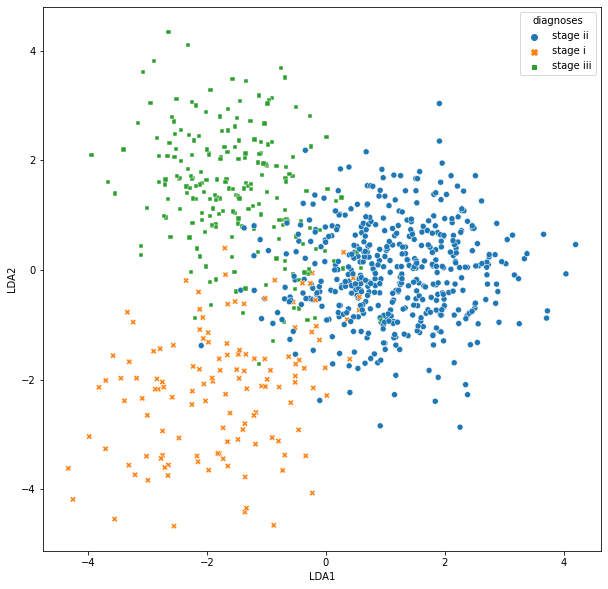

In [26]:
# plot the distribution of methylation
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_methyl3, x='LDA1', y='LDA2', hue="diagnoses", style="diagnoses")
plt.show()

In [27]:
# update methyl list
methyl_list = list(df_methyl2.columns)

In [28]:
# use mutual information to select


### Deal with micro RNA

In [29]:
# separate columns that represent micro RNA expression
df_micro = df3[micro_list]

In [30]:
# use mutual information to selection genes
selector3 = SelectKBest(chi2, k=30)
selector3.fit(df_micro, df3['diagnoses'])
df_micro2 = selector3.transform(df_micro)
df_micro2 = pd.DataFrame(df_micro2, index=df_micro.index, columns=df_micro.columns[selector3.get_support()])
df_micro2

,hsa-mir-105-1,hsa-mir-105-2,hsa-mir-1251,hsa-mir-1269a,hsa-mir-1269b,hsa-mir-129-1,hsa-mir-138-1,hsa-mir-184,hsa-mir-190b,hsa-mir-3156-1,...,hsa-mir-5571,hsa-mir-577,hsa-mir-6781,hsa-mir-7-3,hsa-mir-767,hsa-mir-885,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-934
TCGA-E9-A1NI-01A,0.000000,0.000000,4.380752,0.000000,0.000000,0.000000,0.000000,6.190272,5.014096,0.000000,...,0.000000,2.860534,0.000000,1.626492,0.000000,2.046637,6.568983,6.661143,6.733686,1.031258
TCGA-A1-A0SP-01A,0.619410,0.619410,0.000000,6.982786,6.065193,1.653055,2.076382,2.249060,0.000000,0.000000,...,0.000000,6.412626,0.000000,1.383354,0.000000,1.383354,12.990746,12.973632,13.008505,2.994799
TCGA-BH-A1EU-11A,0.000000,0.364712,0.364712,0.364712,0.000000,1.104671,0.000000,0.655580,1.591379,0.000000,...,0.000000,1.446652,0.000000,0.000000,0.000000,0.000000,7.448945,7.460771,7.370873,3.888109
TCGA-AC-A8OS-01A,0.000000,0.000000,0.000000,0.318331,0.000000,0.318331,0.578963,5.064612,3.050185,0.000000,...,0.000000,0.000000,0.000000,0.578963,0.167928,0.578963,7.860820,7.854678,7.888892,0.000000
TCGA-OL-A5RY-01A,0.758424,0.602867,0.230094,0.428487,0.230094,1.144290,0.758424,2.588422,0.602867,0.000000,...,0.428487,1.978005,0.000000,0.000000,0.602867,1.144290,7.798772,7.788654,7.885722,1.144290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EW-A1P3-01A,0.000000,0.000000,0.000000,0.507909,0.000000,0.000000,0.000000,2.600237,3.420312,0.507909,...,0.000000,0.000000,0.507909,0.507909,0.000000,0.000000,6.519283,6.492487,6.664387,0.000000
TCGA-A7-A13F-11A,0.000000,0.000000,0.000000,0.000000,0.000000,2.597238,0.939913,0.545184,0.545184,0.000000,...,0.000000,3.587479,0.000000,0.545184,0.000000,1.504278,6.417751,6.571939,6.402169,1.249518
TCGA-A2-A0T6-01A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.936663,2.537889,0.000000,...,0.000000,1.076831,0.000000,1.309872,0.000000,0.798754,6.402152,6.376696,6.311019,0.000000
TCGA-A7-A5ZW-01A,0.280406,0.280406,0.000000,0.000000,0.000000,0.280406,0.280406,2.852314,3.551744,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.280406,0.280406,7.435118,7.404389,7.465206,0.515081


In [31]:
# update the miRNA list
micro_list = list(df_micro2.columns)
micro_list

['hsa-mir-105-1',
 'hsa-mir-105-2',
 'hsa-mir-1251',
 'hsa-mir-1269a',
 'hsa-mir-1269b',
 'hsa-mir-129-1',
 'hsa-mir-138-1',
 'hsa-mir-184',
 'hsa-mir-190b',
 'hsa-mir-3156-1',
 'hsa-mir-3156-2',
 'hsa-mir-3156-3',
 'hsa-mir-3609',
 'hsa-mir-4501',
 'hsa-mir-516a-1',
 'hsa-mir-516a-2',
 'hsa-mir-519a-1',
 'hsa-mir-521-1',
 'hsa-mir-548f-1',
 'hsa-mir-548y',
 'hsa-mir-5571',
 'hsa-mir-577',
 'hsa-mir-6781',
 'hsa-mir-7-3',
 'hsa-mir-767',
 'hsa-mir-885',
 'hsa-mir-9-1',
 'hsa-mir-9-2',
 'hsa-mir-9-3',
 'hsa-mir-934']

## Visualization (through dimensionality reduction)

### gene

OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Text(0.5, 1.0, 'UMAP of gene expression data, shape = (825, 500)')

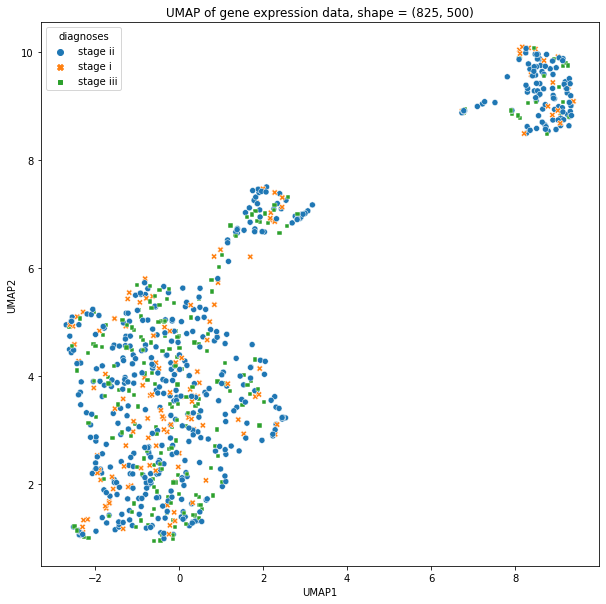

In [32]:
# visualize gene expression data (df_gene2)
reducer1 = umap.UMAP()
embedding1 = reducer1.fit_transform(df_gene2)
embedding1 = pd.DataFrame(embedding1, index=df_gene2.index, columns=['UMAP1', 'UMAP2'])
# merge the embeddings with label
embedding1 = pd.merge(embedding1, df3['diagnoses'], left_index=True, right_index=True)
# plot the embeddings
plt.figure(figsize=(10, 10))
sns.scatterplot(data=embedding1, x="UMAP1", y="UMAP2", hue="diagnoses", style="diagnoses")
plt.title('UMAP of gene expression data, shape = '+str(df_gene2.shape))

Text(0.5, 1.0, 'UMAP plot of DEG, shape = (825, 13)')

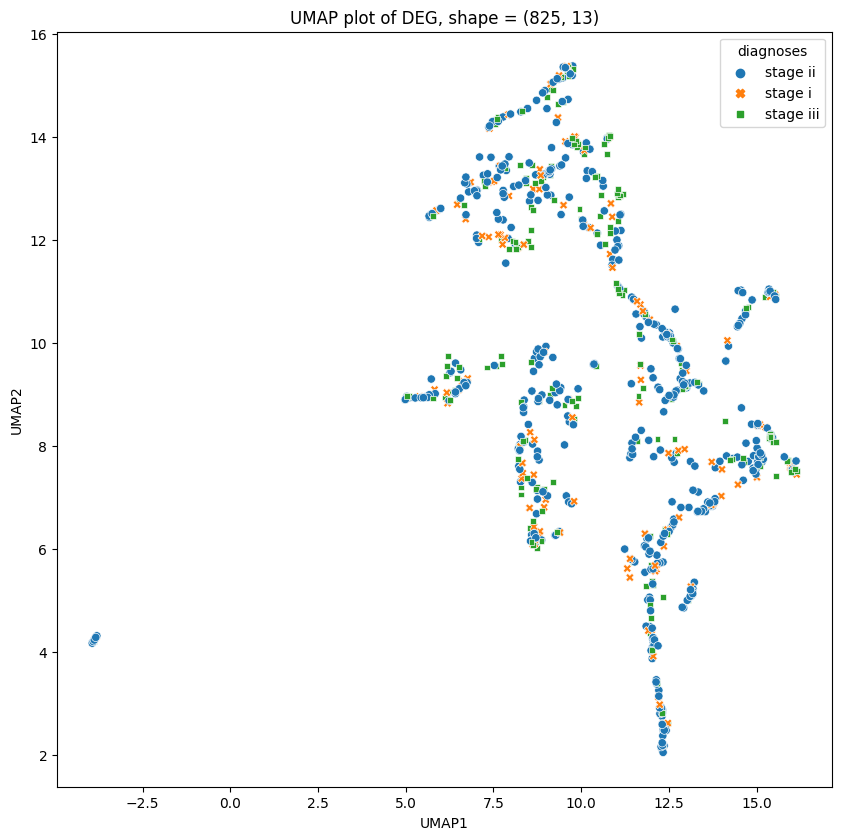

In [33]:
# visualize gene expression data (deg_gene)
from sklearn.decomposition import PCA
reducer2 = umap.UMAP()
embedding2 = reducer1.fit_transform(df_gene3)
embedding2 = pd.DataFrame(embedding2, index=df_gene3.index, columns=['UMAP1', 'UMAP2'])
# merge the embeddings with label
embedding2 = pd.merge(embedding2, df3['diagnoses'], left_index=True, right_index=True)
plt.figure(figsize=(10, 10), dpi=100)
sns.scatterplot(data=embedding2, x="UMAP1", y="UMAP2", hue="diagnoses", style="diagnoses")
plt.title('UMAP plot of DEG, shape = '+str(df_gene3.shape))

lda_gene (a new 825 rows × 3 columns matrix)

In [34]:
# do LDA on gene expression data
lda_gene = LinearDiscriminantAnalysis(n_components=2)
lda_gene.fit(df_gene2, df3['diagnoses'])
df_gene4 = lda_gene.transform(df_gene2)
df_gene4 = pd.DataFrame(df_gene4, index=df_gene2.index, columns=['LDA1', 'LDA2'])
df_gene4 = pd.merge(df_gene4, df3['diagnoses'], left_index=True, right_index=True)
df_gene4

,LDA1,LDA2,diagnoses
TCGA-E9-A1NI-01A,0.849675,-1.556299,stage ii
TCGA-A1-A0SP-01A,0.042786,-1.744473,stage ii
TCGA-BH-A1EU-11A,-3.219945,2.184481,stage i
TCGA-AC-A8OS-01A,0.831747,-3.457489,stage ii
TCGA-OL-A5RY-01A,0.065048,-1.199624,stage ii
...,...,...,...
TCGA-EW-A1P3-01A,-0.911293,-0.130693,stage ii
TCGA-A7-A13F-11A,0.739343,1.377515,stage iii
TCGA-A2-A0T6-01A,-1.196503,-0.552252,stage ii
TCGA-A7-A5ZW-01A,-0.055496,-0.035760,stage ii


Text(0.5, 1.0, 'LDA plot of genes, shape = (825, 500)')

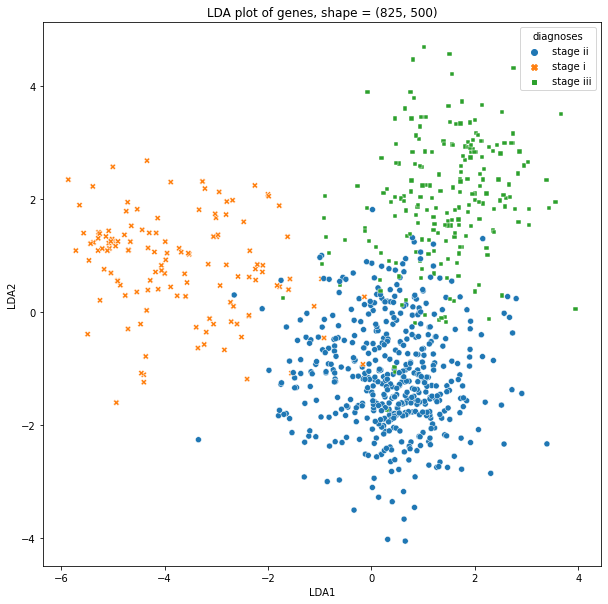

In [35]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_gene4, x='LDA1', y='LDA2', hue="diagnoses", style="diagnoses")
plt.title('LDA plot of genes, shape = '+str(df_gene2.shape))

draw DE Methylation

In [36]:
reducer_methyl = umap.UMAP()
embedding_methyl = reducer_methyl.fit_transform(df_methyl2)
embedding_methyl = pd.DataFrame(embedding_methyl, index=df_methyl2.index, columns=['UMAP1', 'UMAP2'])
# merge the embeddings with label
embedding_methyl = pd.merge(embedding_methyl, df3['diagnoses'], left_index=True, right_index=True)

Text(0.5, 1.0, 'UMAP of methylation (825, 500)')

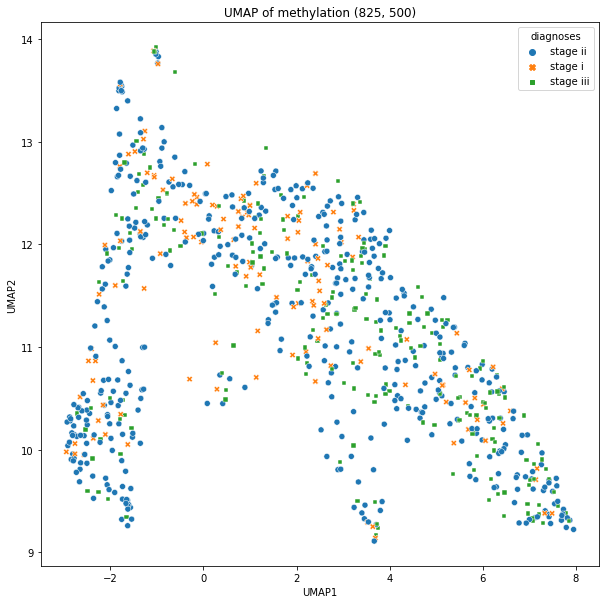

In [37]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=embedding_methyl, x="UMAP1", y="UMAP2", hue="diagnoses", style="diagnoses")
plt.title('UMAP of methylation '+str(df_methyl2.shape))

## Modeling
### Separately

### 1 gene expression

In [38]:
X_train_gene, X_test_gene, y_train_gene, y_test_gene = train_test_split(df_gene2, df3['diagnoses'], test_size=0.25)
lda_gene2 = LinearDiscriminantAnalysis(n_components=2)
lda_gene2.fit(X_train_gene, y_train_gene)

LinearDiscriminantAnalysis(n_components=2)

In [39]:
X_train_gene_lda = lda_gene2.transform(X_train_gene)
X_train_gene_lda = pd.DataFrame(X_train_gene_lda, index=X_train_gene.index, columns=['LDA1', 'LDA2'])
X_train_gene_lda = pd.merge(X_train_gene_lda, y_train_gene, left_index=True, right_index=True)

X_test_gene_lda = lda_gene2.transform(X_test_gene)
X_test_gene_lda = pd.DataFrame(X_test_gene_lda, index=X_test_gene.index, columns=['LDA1', 'LDA2'])
X_test_gene_lda = pd.merge(X_test_gene_lda, y_test_gene, left_index=True, right_index=True)

Text(0.5, 1.0, 'LDA of gene expression data of test set (trained on training set)')

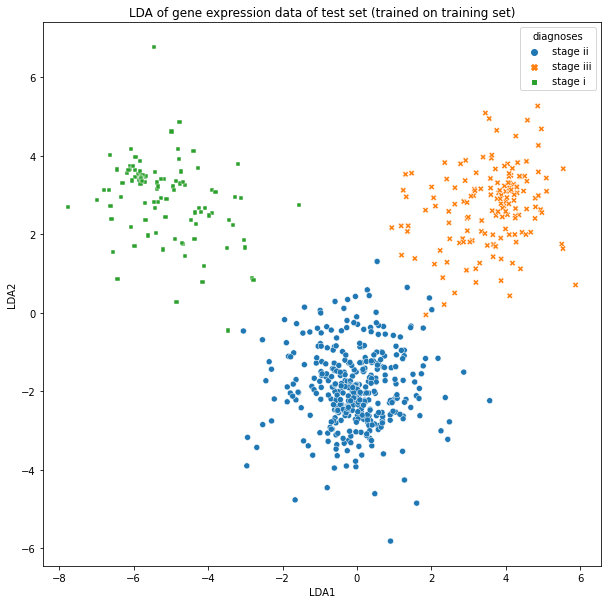

In [40]:
# visualize gene expression data (df_gene2)
plt.figure(figsize=(10, 10))
sns.scatterplot(data=X_train_gene_lda, x="LDA1", y="LDA2", hue="diagnoses", style="diagnoses")
plt.title('LDA of gene expression data of test set (trained on training set)')

Text(0.5, 1.0, 'LDA of gene expression data of test set (trained on training set)')

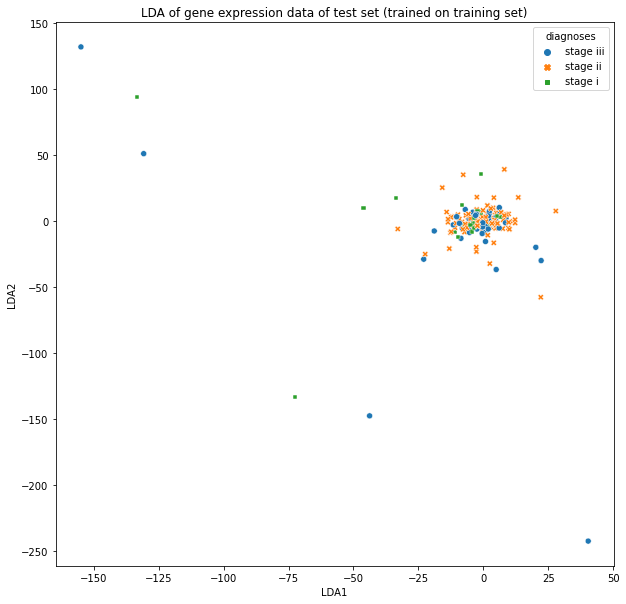

In [41]:
# visualize gene expression data (df_gene2)
plt.figure(figsize=(10, 10))
sns.scatterplot(data=X_test_gene_lda, x="LDA1", y="LDA2", hue="diagnoses", style="diagnoses")
plt.title('LDA of gene expression data of test set (trained on training set)')

### 2 methylation

In [42]:
X_train_methyl, X_test_methyl, y_train_methyl, y_test_methyl = train_test_split(df_methyl2, df3['diagnoses'], test_size=0.25, random_state=0)

In [43]:
svm_methyl = SVC(kernel='linear', probability=True)
svm_methyl.fit(X_train_methyl, y_train_methyl)
y_pred_methyl = svm_methyl.predict(X_test_methyl)
y_pred_score_methyl = svm_methyl.predict_proba(X_test_methyl)
print('Accuracy: ', accuracy_score(y_test_methyl, y_pred_methyl))
print('Confusion matrix\n', confusion_matrix(y_test_methyl, y_pred_methyl))

Accuracy:  0.4057971014492754
Confusion matrix
 [[ 4 25 11]
 [19 69 21]
 [14 33 11]]


In [44]:
rf_methyl = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf_methyl.fit(X_train_methyl, y_train_methyl)
y_pred_methyl2 = rf_methyl.predict(X_test_methyl)
y_pred_score_methyl2 = rf_methyl.predict_proba(X_test_methyl)
print('Accuracy: ', accuracy_score(y_test_methyl, y_pred_methyl2))
print('Confusion matrix: \n', confusion_matrix(y_test_methyl, y_pred_methyl2))

Accuracy:  0.5265700483091788
Confusion matrix: 
 [[  0  40   0]
 [  0 109   0]
 [  0  58   0]]


try LDA

In [45]:
lda2 = LinearDiscriminantAnalysis(n_components=2)
lda2.fit(X_train_methyl, y_train_methyl)
X_train_methyl_lda = lda2.transform(X_train_methyl)
X_test_methyl_lda = lda2.transform(X_test_methyl)


In [46]:
# build svm model
svm_methyl_lda = SVC(kernel='linear', probability=True)
svm_methyl_lda.fit(X_train_methyl_lda, y_train_methyl)
y_pred_methyl_lda = svm_methyl_lda.predict(X_test_methyl_lda)
y_pred_score_methyl_lda = svm_methyl_lda.predict_proba(X_test_methyl_lda)
print('Accuracy: ', accuracy_score(y_test_methyl, y_pred_methyl_lda))
print('Confusion matrix: \n', confusion_matrix(y_test_methyl, y_pred_methyl_lda))

Accuracy:  0.2946859903381642
Confusion matrix: 
 [[ 5 16 19]
 [30 39 40]
 [12 29 17]]


Text(0.5, 1.0, 'LDA of methylation (training set)')

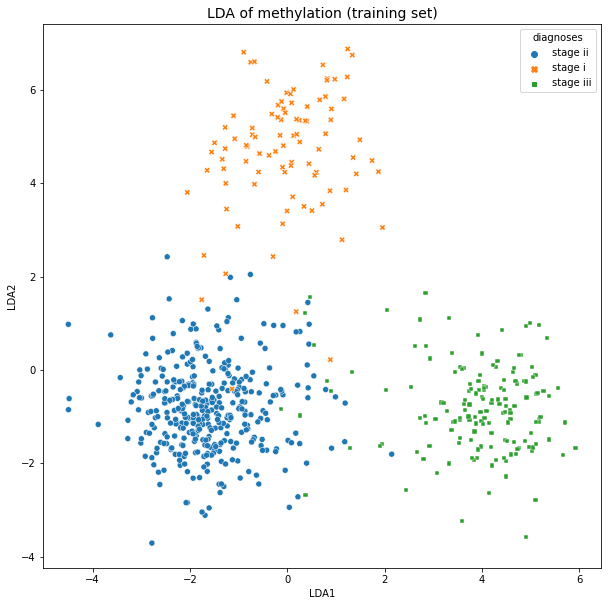

In [47]:
df_try_train = pd.DataFrame(X_train_methyl_lda, columns=['LDA1', 'LDA2'], index=X_train_methyl.index)
df_try_train = pd.merge(df_try_train, y_train_methyl, left_index=True, right_index=True)
df_try_train
# plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_try_train, x="LDA1", y="LDA2", hue="diagnoses", style="diagnoses")
plt.title('LDA of methylation (training set)', fontsize=14)


Text(0.5, 1.0, 'LDA of methylation (test set)')

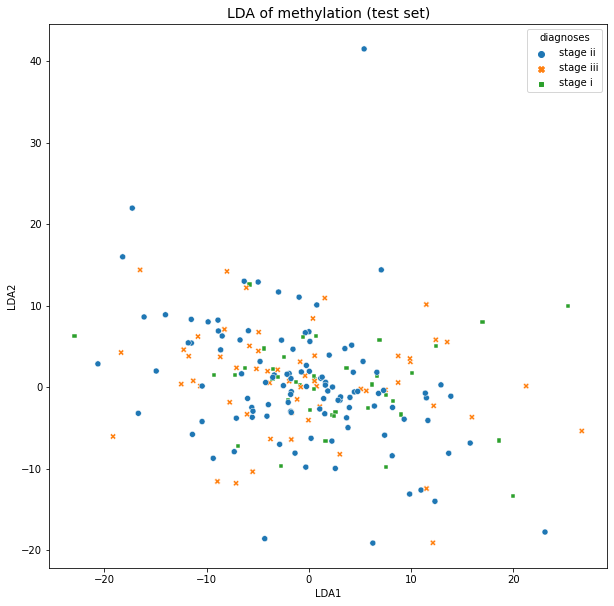

In [48]:
df_try_test = pd.DataFrame(X_test_methyl_lda, columns=['LDA1', 'LDA2'], index=X_test_methyl.index)
df_try_test = pd.merge(df_try_test, y_test_methyl, left_index=True, right_index=True)
df_try_test
# plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_try_test, x="LDA1", y="LDA2", hue="diagnoses", style="diagnoses")
plt.title('LDA of methylation (test set)', fontsize=14)


In [49]:
predictor = SVC(kernel='linear', probability=True)
X_train_methyl_lda = lda.transform(X_train_methyl)
X_test_methyl_lda = lda.transform(X_test_methyl)
predictor.fit(X_train_methyl_lda, y_train_methyl)
y_pred_methyl_lda = predictor.predict(X_test_methyl_lda)

print('Accuracy', accuracy_score(y_test_methyl, y_pred_methyl_lda))
print('Confusion matrix: \n', confusion_matrix(y_test_methyl, y_pred_methyl_lda))


Accuracy 0.8647342995169082
Confusion matrix: 
 [[ 30   9   1]
 [  1 105   3]
 [  0  14  44]]


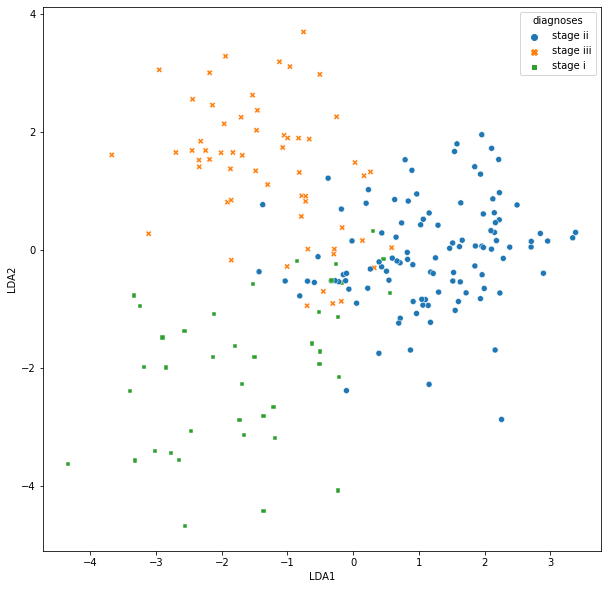

In [50]:
df_try = pd.DataFrame(X_test_methyl_lda, columns=['LDA1', 'LDA2'], index=X_test_methyl.index)
df_try = pd.merge(df_try, y_test_methyl, left_index=True, right_index=True)
# plot the distribution of methylation
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_try, x='LDA1', y='LDA2', hue="diagnoses", style="diagnoses")
plt.show()

### 3 micro-RNA

In [51]:
X_train_micro, X_test_micro, y_train_micro, y_test_micro = train_test_split(df_micro2, df3['diagnoses'], test_size=0.25, random_state=0)

In [68]:
# svm
svm_micro = SVC(kernel='linear', C=1.0, probability=True)
svm_micro.fit(X_train_micro, y_train_micro)
y_pred_micro = svm_micro.predict(X_test_micro)
y_pred_score_micro = svm_micro.predict_proba(X_test_micro)
print(accuracy_score(y_test_micro, y_pred_micro))
print(confusion_matrix(y_test_micro, y_pred_micro))

0.5217391304347826
[[  0  39   1]
 [  0 108   1]
 [  0  58   0]]


In [53]:
# build a random forest
rf_micro = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf_micro.fit(X_train_micro, y_train_micro)
y_pred_micro = rf_micro.predict(X_test_micro)
y_pred_score_micro = rf_micro.predict_proba(X_test_micro)
print(accuracy_score(y_test_gene, y_pred_micro))
print(confusion_matrix(y_test_gene, y_pred_micro))

0.5555555555555556
[[  0  30   0]
 [  0 115   0]
 [  0  62   0]]


### Cross validation for hyperparameter tuning

In [60]:
param_grid1 = {'C': [0.1, 1, 10, 100], 
               'gamma': [1, 0.1, 0.01, 0.001], 
               'kernel': ['linear', 'poly', 'sigmoid']}
grid_gene = GridSearchCV(SVC(kernel='linear', probability=True), param_grid=param_grid1, cv=5)
grid_gene.fit(X_train_gene, y_train_gene)
print(grid_gene.best_params_)
print(grid_gene.best_score_)

{'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.5937975347495411


In [61]:
grid_methyl = GridSearchCV(SVC(kernel='linear', probability=True), param_grid1, cv=5)
grid_methyl.fit(X_train_methyl, y_train_methyl)
print(grid_methyl.best_params_)
print(grid_methyl.best_score_)

{'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.6003802779963283


In [66]:
param_grid1 = {'C': [0.1, 1, 10]}

In [67]:
grid_micro = GridSearchCV(SVC(kernel='linear', probability=True), param_grid1, cv=5)
grid_micro.fit(X_train_micro, y_train_micro)
print(grid_micro.best_params_)
print(grid_micro.best_score_)

KeyboardInterrupt: 

In [ ]:


grid_micro.best_estimator_.fit(X_train_micro, y_train_micro)
y_pred_micro = grid_micro.best_estimator_.predict(X_test_micro)

print('Accuracy', accuracy_score(y_test_micro, y_pred_micro))
print('Confusion matrix: \n', confusion_matrix(y_test_micro, y_pred_micro))

## Ensemble model

In [70]:
# calculate probability scores
y_pred_score_gene = grid_gene.best_estimator_.predict_proba(X_test_gene)
y_pred_score_methyl = grid_methyl.best_estimator_.predict_proba(X_test_methyl)
y_pred_score_micro = grid_micro.best_estimator_.predict_proba(X_test_micro)

In [86]:
# combine the results of three classifiers
l = [(0.1, 0.3, 0.6), (0.1, 0.5, 0.4) ,(0.2, 0.4, 0.4), (0.2, 0.6, 0.2), (0.3, 0.3, 0.4), (0.3, 0.5, 0.2) ,(0.4, 0.2, 0.4), (0.5, 0.1, 0.4)]

In [83]:
convert = ['stage i', 'stage ii', 'stage iii']

In [84]:
y_test = [convert.index(i) for i in y_test_gene]
y_test

[1,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1]

In [87]:
for i in l:
    y_pred_score = i[0] * y_pred_score_gene + i[1] * y_pred_score_methyl + i[2] * y_pred_score_micro
    y_pred = np.argmax(y_pred_score, axis=1)

    print('Weight', i)
    print('Accuracy', accuracy_score(y_test, y_pred))
    print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))

Weight (0.1, 0.3, 0.6)
Accuracy 0.5265700483091788
Confusion matrix: 
 [[  0  39   1]
 [  0 109   0]
 [  0  58   0]]
Weight (0.1, 0.5, 0.4)
Accuracy 0.5265700483091788
Confusion matrix: 
 [[  0  40   0]
 [  0 109   0]
 [  0  58   0]]
Weight (0.2, 0.4, 0.4)
Accuracy 0.5265700483091788
Confusion matrix: 
 [[  0  39   1]
 [  0 109   0]
 [  0  58   0]]
Weight (0.2, 0.6, 0.2)
Accuracy 0.5265700483091788
Confusion matrix: 
 [[  0  40   0]
 [  0 109   0]
 [  0  58   0]]
Weight (0.3, 0.3, 0.4)
Accuracy 0.5265700483091788
Confusion matrix: 
 [[  0  39   1]
 [  0 109   0]
 [  0  58   0]]
Weight (0.3, 0.5, 0.2)
Accuracy 0.5265700483091788
Confusion matrix: 
 [[  0  40   0]
 [  0 109   0]
 [  0  58   0]]
Weight (0.4, 0.2, 0.4)
Accuracy 0.5265700483091788
Confusion matrix: 
 [[  0  39   1]
 [  0 108   1]
 [  0  57   1]]
Weight (0.5, 0.1, 0.4)
Accuracy 0.5458937198067633
Confusion matrix: 
 [[  0  39   1]
 [  0 108   1]
 [  0  53   5]]
